In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from scipy.optimize import minimize
from scipy.misc import derivative
from scipy.integrate import quad, dblquad
from scipy.stats import beta

class MatematicaEstatistica:
    def __init__(self) -> None:
        pass  
  
class Calculo:
    def __init__(self) -> None:
        pass

class AlgebraLinear:
    def __init__(self) -> None:
        pass

class ProcessamentoDigitalSinais:
    def __init__(self) -> None:
        pass  

class MathComputacional:
    def __init__(self) -> None:
        self.calculo = Calculo()
        self.algebra_linear = AlgebraLinear()
        self.processamento_digital = ProcessamentoDigitalSinais()
        self.stats = MatematicaEstatistica()
        


### Algebra linear

1) Triangular matrices

$$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [2]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

2)Toeplitz Matrices (matrices with constant diagonals) 

$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [3]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

### Otimização

1) Minimize $f(x) = (x-3)^2$

In [4]:
def f(x):
    return (x-3)**2

res = minimize(f, x0=2)
print(res)
print("Valor de x = ",res.x)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3
Valor de x =  [2.99999999]


2) Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [5]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

print(res.x)

[1.4 1.7]


## Interpolação

### Derivada

/tmp/ipykernel_303673/2996567756.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6))
/tmp/ipykernel_303673/2996567756.py:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2))


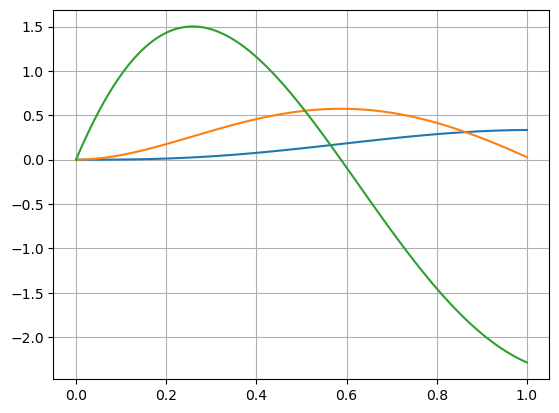

In [6]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))
plt.grid()

### Integral

1) $$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [7]:
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)
integral

0.14558175869954834

2) Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [8]:
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)
integral

0.590090324408853

### Transformada de Fourier e Processamento digital de sinais

The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$

* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$

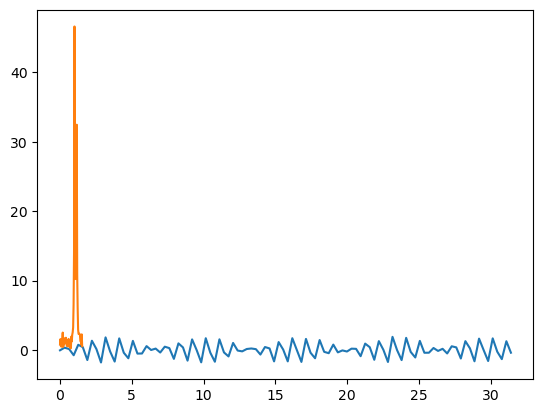

In [9]:
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(x, y)

from scipy.fft import fft, fftfreq
N = len(y)
yf = fft(y)[:N//2]
xf = fftfreq(N, np.diff(x)[0])[:N//2]

plt.plot(xf, np.abs(yf))
plt.show()

### Estatistica aplicada

**Example 1**: $\beta$ distribution

$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1$$

In [10]:
#basics 
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

print(mean,var)

def gerar_variaveis_aleatorias(a,b):
    r = beta.rvs(a, b, size=10)
    return r

gerar_variaveis_aleatorias(a,b)



0.44642857142857145 0.03744395485466914


array([0.87284067, 0.41328963, 0.73844544, 0.33200848, 0.4643091 ,
       0.38451483, 0.56671219, 0.54206298, 0.86536575, 0.71691951])

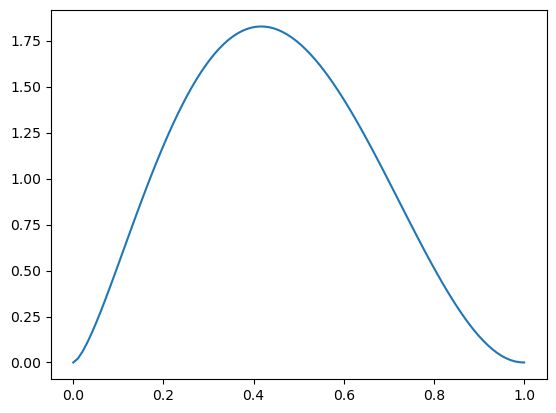

In [11]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

**Example 2**: Gaussian Distribution

$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp}\left(-\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

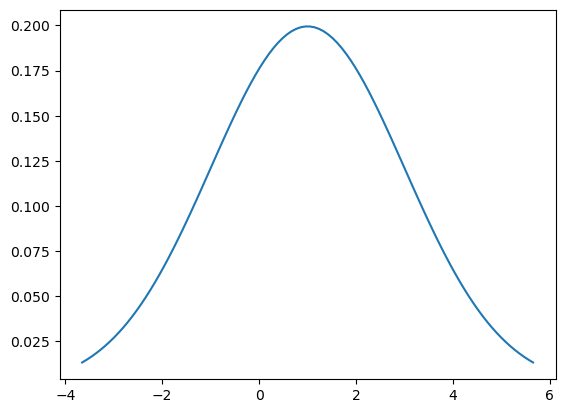

In [12]:
from scipy.stats import norm
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))